In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

def calculate_stats(graph):
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)
    avg_degree = sum(dict(graph.degree()).values()) / num_nodes
    is_connected = nx.is_connected(graph.to_undirected())
    num_components = nx.number_connected_components(graph.to_undirected())
    
    return {
        "Nodes": num_nodes,
        "Edges": num_edges,
        # "Density": f"{density:.4f}",
        # "Avg Degree": f"{avg_degree:.2f}",
        # "Connected": str(is_connected),
        # "Components": num_components
    }

# List all JSON files in the current directory
FILES = [f for f in os.listdir('.') if f.endswith('data_graph.json')]
NAMES = [os.path.splitext(f)[0] for f in FILES]  # Use filenames without extension as names
COLORS = plt.cm.rainbow(np.linspace(0, 1, len(FILES)))  # Generate colors dynamically

# Calculate the number of rows and columns needed for subplots
n = len(FILES)
nrows = int(np.ceil(np.sqrt(n)))
ncols = int(np.ceil(n / nrows))

# fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
# axs = axs.flatten() if n > 1 else [axs]  # Flatten the array to make it easier to iterate

all_stats = {}

# for i, (json_file, name, color, ax) in enumerate(zip(FILES, NAMES, COLORS, axs)):
for i, (json_file, name, color) in enumerate(zip(FILES, NAMES, COLORS)):
    # Load and create the graph
    with open(json_file, "r") as f:
        data = json.load(f)
    graph = nx.node_link_graph(data)

    # Calculate statistics
    stats = calculate_stats(graph)
    all_stats[name] = stats

    # # Visualize the graph
    # pos = nx.spring_layout(graph)
    # nx.draw(graph, pos, ax=ax, node_size=30, node_color=color, with_labels=False)

    # # Add statistics as text
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    # ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10, 
    #         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

    # ax.set_title(f"{name} Network")
    # ax.axis('off')

    # Print statistics for the report
    print(f"{name} Statistics:")
    print(stats_text)
    print()

# Remove any unused subplots
# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

# plt.tight_layout()
# plt.suptitle("Network Visualizations", fontsize=16, y=1.02)
# plt.show()

# Create pandas DataFrame
df = pd.DataFrame(all_stats).T

# Generate LaTeX table
latex_table = df.to_latex(caption="Network Statistics Comparison",
                          label="tab:network_stats",
                          float_format="%.4f",
                          bold_rows=True)

print("\nLaTeX Table:")
print(latex_table)

Union_(American_Civil_War)_visualisation_data_graph Statistics:
Nodes: 2689
Edges: 4681

Component_(graph_theory)_visualisation_data_graph Statistics:
Nodes: 2471
Edges: 4734

Algebraic_matroid_visualisation_data_graph Statistics:
Nodes: 1880
Edges: 4325

Chordal_graph_visualisation_data_graph Statistics:
Nodes: 1944
Edges: 3864

Quantum_computing_visualisation_data_graph Statistics:
Nodes: 3397
Edges: 6024

Graph_partition_visualisation_data_graph Statistics:
Nodes: 2776
Edges: 4949

Biconnected_component_visualisation_data_graph Statistics:
Nodes: 2496
Edges: 4310

Matching_(graph_theory)_visualisation_data_graph Statistics:
Nodes: 1793
Edges: 3540

Gephi_visualisation_data_graph Statistics:
Nodes: 2317
Edges: 2904

Greedy_algorithm_visualisation_data_graph Statistics:
Nodes: 2815
Edges: 4795

Associative_array_visualisation_data_graph Statistics:
Nodes: 2965
Edges: 5309

Trie_visualisation_data_graph Statistics:
Nodes: 3153
Edges: 5303

Array_data_type_visualisation_data_graph Stati

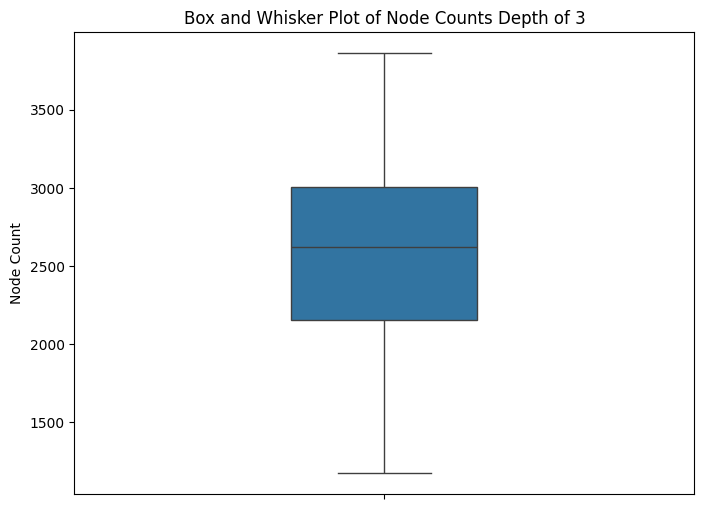

Length of nodes is 70
Mean number of nodes: 2591.29


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the node counts from the DataFrame
node_counts = df["Nodes"]

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=node_counts, orient="v", width=0.3)

# Customize the plot
plt.title("Box and Whisker Plot of Node Counts Depth of 3")
plt.ylabel("Node Count")
plt.xlabel("")  # Remove x-label as it's not needed for a single variable

# Show the plot
plt.show()

# Calculate and print statistics
mean_nodes = df["Nodes"].mean()
print(f"Length of nodes is {len(df['Nodes'])}")
print(f"Mean number of nodes: {mean_nodes:.2f}")